<span style="font-size: xx-large; font-weight: bold;">Lecture 3 - One-sample and Two-sample Tests</span>

Ref: https://courses.edx.org/courses/BerkeleyX/Stat_2.3x/2T2014/course/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import t

# %pylab inline

# z-test for a population mean

## Average Height of University Students

**Problem**
- Average height of U.S. men: 69.5 inches
- Data: Simple random sample of 100 men taken in a university system with tens of thousands of students
  - Average height in sample: 69 inches
  - SD of heights in sample: 2.5 inches

**Question**: Are the men in the university system shorter, on average, than U.S. men? Or is this just chance variation?

In [2]:
from scipy.stats import norm

# Data
n = 100
sample_mu = 69
sample_sd = 2.5
pop_mu = 69.5

# Calculate the Standard Error (SE)
SE = sample_sd / np.sqrt(n)
print("- SE = {}".format(SE))

# Calculate the z value
z = (sample_mu - pop_mu) / SE
print("- z = {}".format(z))

# Calculate the P-value
P_value = norm.cdf(z)
print("- P-value = {:.3f}%".format(100 * P_value))

if (P_value < 0.05):
    print("=> ACCEPT HA that students are shorter")
else:
    print("=> ACCEPT H0 that students are not different in height.")

- SE = 0.25
- z = -2.0
- P-value = 2.275%
=> ACCEPT HA that students are shorter


# t-test for a population mean

## Five Mice

- Population of mice of a particular breed and age
- External standard: average weight is believed to be 30 gm
- Data: SRS of 5 mice from a large number of this breed and age;weight (gm): 31.8, 30.9, 34.2, 32.1, 28.8 sample mean = 31.56 gm

**Question**:
- Is the average weight of the population more than 30 gm? 
- Or is this just chance variation?

**Issues**
- Sample is small; 
- can’t apply Central Limit Theorem to the distribution of the sample mean; 
- can’t assume probabilities for sample mean are normal. (unless the variable itself is normal)

**Note**
- Due to the small sample size, we need to use t-test to get the SD.

In [3]:
from scipy.stats import t

# Data
pop_mean = 30.00
samples = [31.8, 30.9, 34.2, 32.1, 28.8]
sample_mean = np.mean(samples)
n = len(samples)
sample_sd = np.std(samples, ddof=1)  # Means Delta Degrees of Freedom = 1

print("- samples = {}".format(samples))
print("- sample mean = {:.4f}".format(sample_mean))
print("- sample SD = {:.4f}".format(sample_sd))
print("- population mean = {:.4f}".format(pop_mean))

# Calculate t (relative of z)
SE = sample_sd / np.sqrt(n)
t_val = (sample_mean - pop_mean) / SE
print("- SE of sample mean = {:.4f}".format(SE))
print("- t = {:.4f}".format(t_val))

# Calculate P-value
dof = n - 1
P_val = 1 - t.cdf(t_val, dof)
print("- P-value = {:.4f}%".format(100 * P_val))

if P_val > 0.05:
    print("=> Reject H0")
else:
    print("=> Accept H0")

- samples = [31.8, 30.9, 34.2, 32.1, 28.8]
- sample mean = 31.5600
- sample SD = 1.9604
- population mean = 30.0000
- SE of sample mean = 0.8767
- t = 1.7794
- P-value = 7.4894%
=> Reject H0


# Exercises

## Phone Battery Hours

A cellular phone manufacturer claims that the rechargeable batteries in a particular model
of phone give an average of 2 hours of talk time.
A consumer group files a lawsuit against the manufacturer, 
alleging that the batteries do not last as long as claimed.
**The consumer group hires you as an expert witness.**

You propose to test the hypothesis that the average talk time is 2 hours, 
at significance level 10%.  For "fairness," you decide to do a two-tail z test, based on the sample mean talk time of 100 phones. The lawyers obtain a court order to compel the manufacturer to deliver 100 phones for testing. You measure the talk time of each phone, starting with fully charged batteries. The average talk time is 1.98 hours, with a sample standard deviation of 0.1 hours.

**QUESTION**: Should you reject the null hypothesis at significance level 10%?

**ANSWER**:  No. (Because we cannot proceed with the test!)

There is no reason to think that the sample is random; using these data for a test of significance is meaningless. The manufacturer might have sent phones with particularly long talk times, or particularly short talk times. One cannot perform a significance test without a well-defined random mechanism.

Ref: https://www.stat.berkeley.edu/~stark/SticiGui/Text/zTest.htm (Exercise 30-1)

## Phone Battery Hours (Cont.)

You convince the lawyers that it is crucial to base the inference on a random sample. 
To take a random sample, you select 100 cell phone stores at random from phone books in 10 major cities, and buy one phone of the model in question from each store.  Suppose that the resulting sample is effectively a random sample of size 100 with replacement from the population of phones of that model currently available for sale in the U.S.

You measure the talk time of each phone, starting with fully charged batteries.
The average talk time is 1.98 hours, with a sample standard deviation of 0.1 hours.

**QUESTIONS**:
1. What is the z score? 
2. What is the P-value of the null hypothesis given these data? 
3. Should you reject the null hypothesis at significance level 10%?

Ref: https://www.stat.berkeley.edu/~stark/SticiGui/Text/zTest.htm (Exercise 30-2)

In [4]:
# Get the z value
n = 100
sample_mean = 1.98
sample_SD = 0.1
pop_mean = 2.0
sample_SE = 0.1 / np.sqrt(100)
z = (sample_mean - pop_mean) / sample_SE
print("SE = {}".format(sample_SE))
print("z = {:.2f}".format(z))

# Get the P-value
P_val = 2 * norm.cdf(z)
print("P-value = {:.3f}%".format(100*P_val))

# Conclusion:
if P_val < 0.10:
    print("=> Reject the Null Hypothesis.")
else:
    print("=> Accept the Null Hypothesis.")
    
# Comments:
#  I think the consumer group is too picky.
#  The test shows a mean of 1 hour 58.8 minutes +- 0.6 minutes.
#  Do we need a legal case to say that it is significantly different from 2 hours?

SE = 0.01
z = -2.00
P-value = 4.550%
=> Reject the Null Hypothesis.


## Inventory Shrinkage

A discount store is comparing the rate of inventory "shrinkage" for food and non-food items. 
*Shrinkage* is losing inventory unintentionally, for example, through **shoplifting**.

Management is going to install more security cameras in the store, but has not decided where to put them. The store stocks thousands of food and non-food items. Some of the managers think that food items are stolen more frequently than non-food items, so the new cameras should be concentrated disproportionately in the food aisles. To inform the decision, management wants to test the null hypothesis that the shrinkage is the same for food and non-food items, against the alternative hypothesis that shrinkage is higher for food items. Shrinkage will be measured in units of lost dollars per line item of inventory.

To test the hypothesis, internal auditors will select simple random samples of 400 food line items
and 400 from the thousands of food and non-food line items the store offers.
These sample sizes are small compared with the numbers of food and non-food items stocked, so the simple random samples can be treated as if they were random samples with replacement.

For each line item in the sample, the auditors note the number of units inventory records show to be in stock (recorded units) and physically count the number of units in stock (counted units). They multiply the discrepancy, recorded units minus the counted units, by the replacement cost per item, to obtain the total number of dollars of inventory missing for that line item. Then they find the sample mean and sample standard deviation of the missing dollars of inventory per line item separately for food and non-food items.

Let X be the sample mean missing dollars per food line item; let Y be the sample mean missing dollars per non-food line item; and let SX and SY be the corresponding sample standard deviations.

Suppose that X = \\$0.48, Y = \\$0.09, SX = \\$0.1, and SY = \\$0.76.

**Questions**:
1. What is the estimated SE of X − Y? 
2. What is the observed z-score? 
3. What is the P-value of the null hypothesis? 
4. Should the null hypothesis be rejected at significance level 5%? 

Ref: https://www.stat.berkeley.edu/~stark/SticiGui/Text/zTest.htm (Exercise 30-3)

In [5]:
mu_x = 0.48
mu_y = 0.09
sd_x = 0.1
sd_y = 0.76
n = 400
se_x = sd_x / np.sqrt(400)
se_y = sd_y / np.sqrt(400)
print("SE X = {}".format(se_x))
print("SE Y = {}".format(se_y))

se = np.sqrt(se_x**2 + se_y**2)
print("SE X-Y = {:.5f}".format(se))

z = (mu_x - mu_y) / se
print("z = {:.5f}".format(z))

P_val = 1.0 - norm.cdf(z)
print("P-value = {:.5e}".format(P_val))


SE X = 0.005
SE Y = 0.038
SE X-Y = 0.03833
z = 10.17545
P-value = 0.00000e+00


## Normal Distribution

A list of heights is approximately normally distributed with mean 65in. and SD 5in. What is the approximate fraction of numbers in the list between 71in. and 76in.?

Ref: https://www.stat.berkeley.edu/~stark/SticiGui/Text/zTest.htm

In [6]:
sv = norm(65, 5)
cdf_71 = sv.cdf(71)
cdf_76 = sv.cdf(76)
print("CDF(71) = {}".format(cdf_71))
print("CDF(76) = {}".format(cdf_76))
print("Diff    = {}".format(cdf_76 - cdf_71))

CDF(71) = 0.8849303297782918
CDF(76) = 0.9860965524865014
Diff    = 0.10116622270820963


## Normal (Cont.)

A list of heights has mean 62in. and SD 6in. The fraction of values in the list between 54in. and 61in. is **44.26%**.

Is the list of numbers approximately normally distributed?

In [7]:
sv = norm(62, 6)
frac = sv.cdf(61) - sv.cdf(54)
print("Normal Diff = {:.2f}%".format(100*frac))

# 34.26%t is very different from 44.26%
# So that data is NOT normally distributed.

Normal Diff = 34.26%


## Monthly E-mail

An internet service provider (ISP) provides internet connections to 100,000 customers. Historically, its customers have sent and received an average of **200 email messages** per month. The ISP suspects that email use is increasing, and wants to plan for increased demand. To determine whether its customers currently send and receive an average of more than 200 messages per month, the ISP will take a simple random sample of **35** customers and calculate the *sample mean* and *sample standard deviation* of the number of email messages those customers sent and received in the previous month.

- The null hypothesis is that:
  **the population mean == 200 messages/month**

- The alternative hypothesis is that:
  **the population mean > 200 messages/month**

Suppose that the distribution of the number of email messages per month among all customers of the ISP has a nearly normal distribution.

- It is appropriate to use: **a right-tailed t-test**

The sample mean is observed to be **211.2** emails per month, with a sample standard deviation of 66 emails per month.

- The estimated standard error of the sample mean is ___

- The observed value of the T statistic is ___

- The P-value of the null hypothesis is ___
 check answer to exercise 17

- The ISP should reject the null hypothesis at significance level 1% ___

Ref: https://www.stat.berkeley.edu/~stark/SticiGui/Text/zTest.htm (Exercise 30-7)

In [8]:
from scipy.stats import t

sample_mean = 211.2
sample_sd = 66
n = 35
pop_mean = 200
dof = n - 1

se = sample_sd / np.sqrt(n)
print("SE = {}".format(se))

Tstat = (sample_mean - pop_mean) / se
print("T-statistics = {}".format(Tstat))

Pval = 1.0 - t.cdf(Tstat, dof)
print("P-value = {}".format(Pval))

significance_level = 0.01
if Pval < significance_level:
    print("The ISP shall REJECT the NULL HYPTHOSISI")
else:
    print("The ISP shall Keep the NULL HYPTHOSISI")
    

SE = 11.156036162416418
T-statistics = 1.0039408116775097
P-value = 0.16124949826476165
The ISP shall Keep the NULL HYPTHOSISI


# Scipy Stats Tools

## scipy.stats.t

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

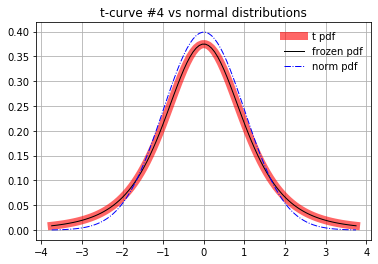

In [9]:
from scipy.stats import t
from scipy.stats import norm

# t Distribution
dof = 4  # degree of freedom
fig, ax = plt.subplots()
x = np.linspace(t.ppf(0.01, dof), t.ppf(0.99, dof), 100)
ax.plot(x, t.pdf(x, dof), 'r-', lw=8, alpha=0.6, label='t pdf')

# Frozon
rv = t(dof)
ax.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf')

# Normal
ax.plot(x, norm.pdf(x), 'b-.', lw=1, label='norm pdf')

plt.title("t-curve #{} vs normal distributions".format(dof))
plt.legend(loc='best', frameon=False)
plt.grid()
plt.show()